### Transformação de features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('datasets/house_prices.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


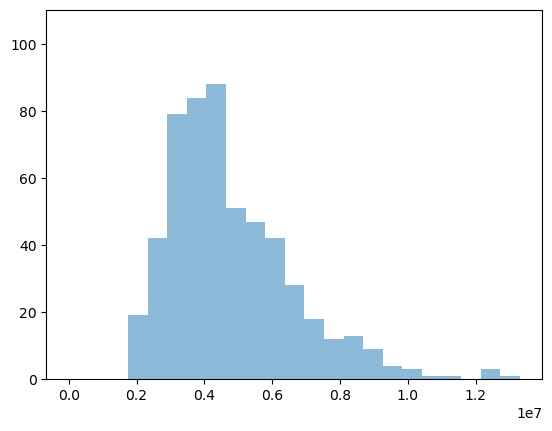

In [3]:
plt.hist(df['price'], bins=20, alpha=0.5, label='Price')
plt.hist(df['area'], bins=20, alpha=0.5, label='Price')
plt.show()

In [4]:
price = df['price'].values
area = df['area'].values

In [5]:
price

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [6]:
scaler = MinMaxScaler()

price_norm = scaler.fit_transform(price.reshape(-1,1))
area_norm = scaler.fit_transform(area.reshape(-1,1))

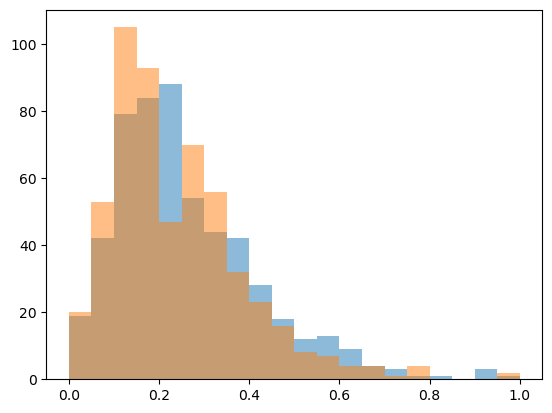

In [7]:
plt.hist(price_norm, bins=20, alpha=0.5, label='Preço Normalizado')
plt.hist(area_norm, bins=20, alpha=0.5, label='Area Normalizada')
plt.show()

**Referência**: https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/

### Regressão Polinomial

Algumas vezes nosso modelo não é capaz de se ajustar ao conjunto de de dados. Talvez nossos dados aprensentem possuam alto viés/variancia, talvez a técnica aplicada não seja adequada ao padrão dos dados. Nesses casos, ocorre `underfitting` do modelo, o modelo possui uma taxa de erro muito alta para ser utilizado na prática. O underfitting ocorre quando temos uma alta diferença entre as métricas de treinamento e as métricas de teste. Assim, interpretamos que o modelo não `generalizou` o padrão conjunto de dados, mas `decorou` padrão do conjunto de testes. 

Vejamos o exemplo a seguir:

**Erros**:
 - Na atribuição de y^2
 - Na construção da feature

### Padrão linear com features lineares

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

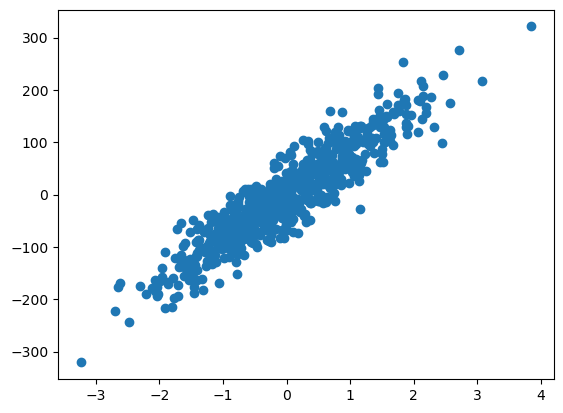

In [9]:
X, y = make_regression(n_samples=700, 
                       n_features=1, 
                       noise=35, 
                       tail_strength=50, 
                       random_state=42)

plt.scatter(X, y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [13]:
vars(model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([80.22707983]),
 'rank_': 1,
 'singular_': array([23.08776411]),
 'intercept_': -1.3640262553519438}

In [14]:
print(f'Intercept: {model.intercept_}')
print(f'Coeficiente: {model.coef_[0]}')

Intercept: -1.3640262553519438
Coeficiente: 80.22707983386685


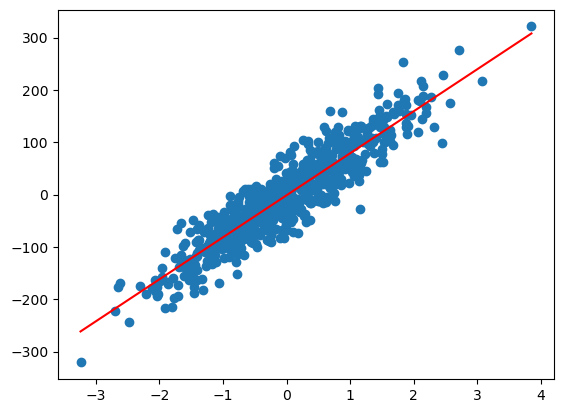

In [15]:
#modelo
x_plot = np.linspace(X.min(), X.max(), 10000)
y_plot = model.intercept_ + model.coef_[0]*x_plot
plt.plot(x_plot, y_plot, color='red')


#dados
plt.scatter(X, y)

### Padrão quadrático com features lineares

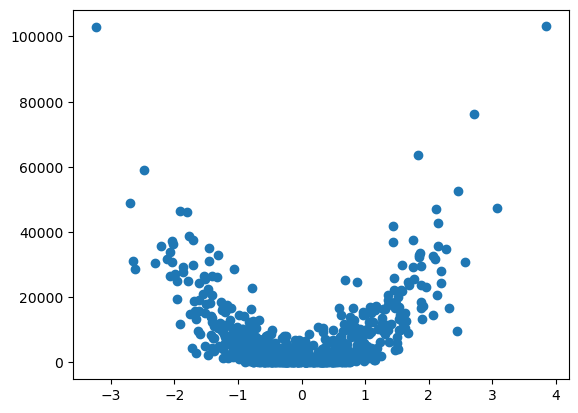

In [18]:
X, y = make_regression(n_samples=700, 
                       n_features=1, 
                       noise=35, 
                       tail_strength=50, 
                       random_state=42)

y = y**2


plt.scatter(X, y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

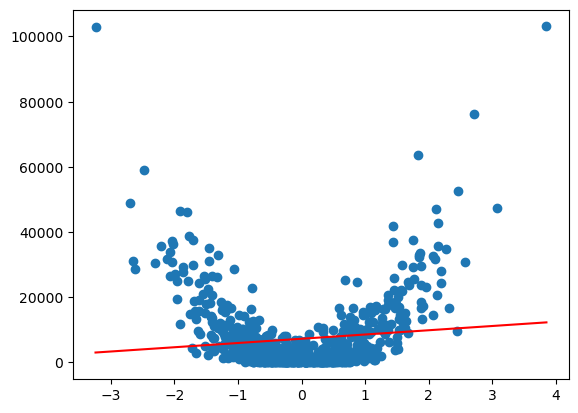

In [21]:
#modelo
x_plot = np.linspace(X.min(), X.max(), 10000)
y_plot = model.intercept_ + model.coef_[0]*x_plot
plt.plot(x_plot, y_plot, color='red')


#dados
plt.scatter(X, y)

### Padrão quadrático com features polinomiais

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Hipótese atual:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrado que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

________

Um outro exemplo: considere uma hipótese linear para um modelo com duas features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

Caso queiramos produzir um modelo quadrático, temos que incluir os termos $x_1^2, x_2^2$ e também $x_1x_2$ (que também é quadrático), de modo que nossa hipótese fica sendo:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

O que não deixa de ser uma **regressão linear múltipla** de 5 variáveis ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ e $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

E assim por diante! ;)

In [ ]:
b0 + b1*(x1**2)

### Features lineares e polinomiais

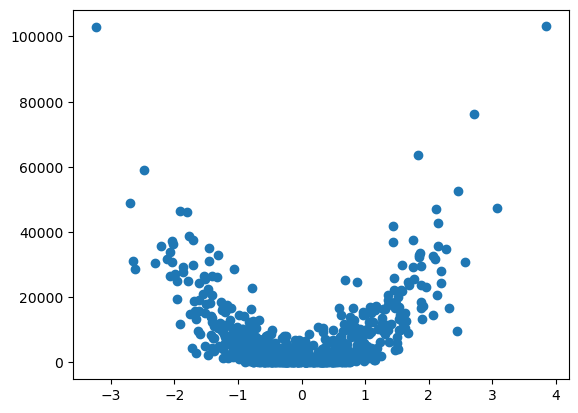

In [37]:
X, y = make_regression(n_samples=700, 
                       n_features=1, 
                       noise=35, 
                       tail_strength=50, 
                       random_state=42)

y = y**2


plt.scatter(X, y)

In [38]:
from sklearn.model_selection import train_test_split

Z = X**2

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score:{r2score} | MSE:{mse}')

R2 Score:0.730054871718425 | MSE:45947589.67286075


In [25]:
X

array([[-1.19787789],
       [-1.02438764],
       [-0.26940683],
       [ 0.38406545],
       [-0.10703036],
       [ 1.86577451],
       [ 1.44127329],
       [-1.77872025],
       [ 0.01023306],
       [ 0.2088636 ],
       [-0.62269952],
       [ 1.40279431],
       [ 0.64768854],
       [ 1.75534084],
       [-0.27272357],
       [-1.00601738],
       [ 2.13303337],
       [-0.24896415],
       [ 0.05921843],
       [-1.40746377],
       [ 0.04808495],
       [-0.98960482],
       [ 0.0976761 ],
       [-1.42474819],
       [-0.39210815],
       [ 0.86575519],
       [ 0.93128012],
       [-1.24573878],
       [ 1.03753994],
       [ 0.88163976],
       [ 0.22388402],
       [-0.05558467],
       [-1.75873949],
       [-0.2176812 ],
       [ 0.01841838],
       [ 0.50404652],
       [-0.03269475],
       [ 0.83033582],
       [ 0.97511973],
       [-0.80829829],
       [-0.41187697],
       [-1.66152006],
       [-0.07710171],
       [ 0.24822059],
       [-0.34271452],
       [ 1

In [26]:
Z

array([[1.43491145e+00],
       [1.04937004e+00],
       [7.25800424e-02],
       [1.47506269e-01],
       [1.14554980e-02],
       [3.48111453e+00],
       [2.07726869e+00],
       [3.16384572e+00],
       [1.04715538e-04],
       [4.36240013e-02],
       [3.87754692e-01],
       [1.96783188e+00],
       [4.19500442e-01],
       [3.08122147e+00],
       [7.43781455e-02],
       [1.01207097e+00],
       [4.54983138e+00],
       [6.19831472e-02],
       [3.50682293e-03],
       [1.98095428e+00],
       [2.31216210e-03],
       [9.79317700e-01],
       [9.54062023e-03],
       [2.02990739e+00],
       [1.53748804e-01],
       [7.49532056e-01],
       [8.67282660e-01],
       [1.55186510e+00],
       [1.07648914e+00],
       [7.77288661e-01],
       [5.01240563e-02],
       [3.08965564e-03],
       [3.09316458e+00],
       [4.73851062e-02],
       [3.39236692e-04],
       [2.54062890e-01],
       [1.06894655e-03],
       [6.89457568e-01],
       [9.50858495e-01],
       [6.53346118e-01],


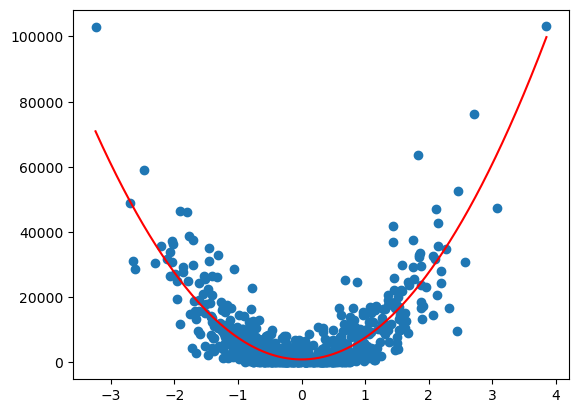

In [28]:
#modelo
x_plot = np.linspace(X.min(), X.max(), 10000)

# y    =     b0           +     b1        *(x1**2)
y_plot = model.intercept_ + model.coef_[0]*(x_plot**2)
plt.plot(x_plot, y_plot, color='red')


#dados
plt.scatter(X, y)

#### v2

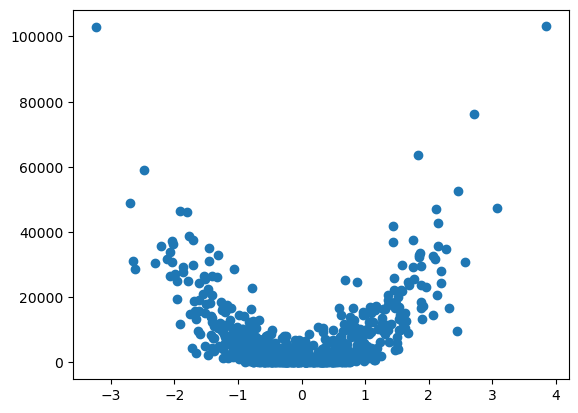

In [29]:
X, y = make_regression(n_samples=700, 
                       n_features=1, 
                       noise=35, 
                       tail_strength=50, 
                       random_state=42)

y = y**2


plt.scatter(X, y)

In [30]:
X_df = pd.DataFrame(X, columns=['X'])
X_df

,X
0,-1.197878
1,-1.024388
2,-0.269407
3,0.384065
4,-0.107030
...,...
695,-0.825497
696,0.081874
697,0.012592
698,1.882024


In [31]:
X_df['Z'] = X_df['X']**2
X_df['A'] = X_df['X']**3
X_df['B'] = X_df['X']**4
X_df

,X,Z,A,B
0,-1.197878,1.434911,-1.718849,2.058971e+00
1,-1.024388,1.049370,-1.074962,1.101177e+00
2,-0.269407,0.072580,-0.019554,5.267863e-03
3,0.384065,0.147506,0.056652,2.175810e-02
4,-0.107030,0.011455,-0.001226,1.312284e-04
...,...,...,...,...
695,-0.825497,0.681446,-0.562531,4.643681e-01
696,0.081874,0.006703,0.000549,4.493523e-05
697,0.012592,0.000159,0.000002,2.514399e-08
698,1.882024,3.542016,6.666161,1.254588e+01


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [34]:
vars(model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['X', 'Z', 'A', 'B'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([  26.65263951, 6632.87907468,  -36.92940233,   10.0586674 ]),
 'rank_': 4,
 'singular_': array([280.71695255,  73.38912251,  18.63971709,  12.26289028]),
 'intercept_': 939.9766852933753}

In [ ]:
y  = b0 + b1*x1 + b2*(x1**2) + b3*(x1**3) + b4*(x1**4)

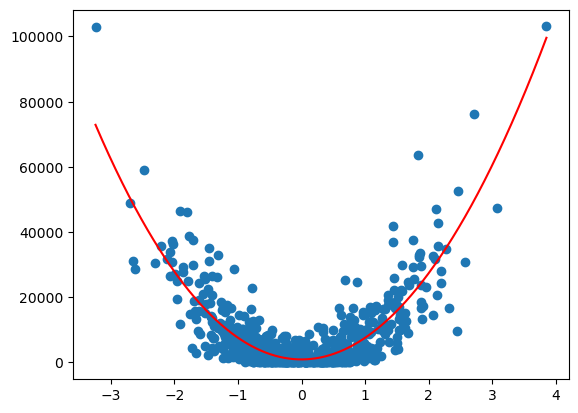

In [35]:
#modelo
x_plot = np.linspace(X.min(), X.max(), 10000)

# y  =        b0          +          b1   *   x1 + b2*(x1**2) + b3*(x1**3) + b4*(x1**4)
y_plot = model.intercept_ + model.coef_[0]*(x_plot) + model.coef_[1]*(x_plot**2) + model.coef_[2]*(x_plot**3) + model.coef_[3]*(x_plot**4)
plt.plot(x_plot, y_plot, color='red')


#dados
plt.scatter(X, y)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score:{r2score} | MSE:{mse}')

R2 Score:0.7344966721345139 | MSE:45191547.04958247


### Regressão polinomial

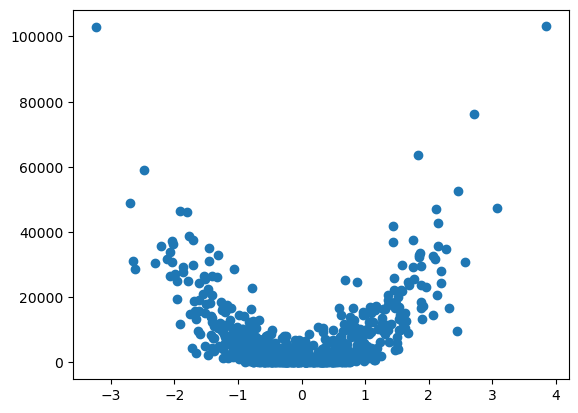

In [41]:
X, y = make_regression(n_samples=700, 
                       n_features=1, 
                       noise=35, 
                       tail_strength=50, 
                       random_state=42)

y = y**2


plt.scatter(X, y)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
pf = PolynomialFeatures(degree=2, include_bias=False)

pf.fit(X_train)

print(pf.n_features_in_)
print(pf.n_output_features_)

1
2


In [45]:
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

In [46]:
X_train

array([[ 0.51378595,  0.263976  ],
       [ 0.2597225 ,  0.06745578],
       [-0.11473644,  0.01316445],
       ...,
       [ 0.71095997,  0.50546408],
       [ 1.1593298 ,  1.34404559],
       [ 0.47323762,  0.22395385]])

In [47]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score:{r2score} | MSE:{mse}')

R2 Score:0.7304991923967287 | MSE:45871961.47264159


### Modelo polinomial

O procedimento acima é bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é nosso primeiro exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem 
ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo.

Lembre-se de fitar o transformados sempre nos dados de treino, apenas! Neste caso, não faz muita diferença, mas, para nos acostumarmos a isso, vamos fazer aqui também!

### Atividade - HousePrice

In [2]:
df = pd.read_csv('datasets/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = df.select_dtypes(include=np.number).dropna()
df.reset_index(drop=True, inplace=True)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1117,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1118,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1119,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Id','SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)

pf.fit(X_train)

X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score:{r2score} | MSE:{mse}')

R2 Score:-11.8610366690101 | MSE:101439124293.87247


### Técnicas de redução de overfitting

- Validação Cruzada
- Ridge (L1)
- Lasso (L2)
- ElasticNet (L1+L2)

### Validação cruzada (Cross Validation)

O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_validate

df = pd.read_csv("datasets/train.csv")

In [10]:
df = df.select_dtypes(include=np.number).dropna()
df.reset_index(drop=True, inplace=True)

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

In [11]:
degree = 3

# Criar o objeto de regressão linear
regression = LinearRegression()

# Definir o objeto KFold para a validação cruzada
kfold = KFold(n_splits=5)

In [15]:
kfold.split(X)

<generator object _BaseKFold.split at 0x000002B73CF4F530>

In [18]:
# Lista para armazenar as métricas de desempenho
r2_scores = []
maes_scores = []
rmse_scores = []

# Realizar a validação cruzada
for train_index, test_index in kfold.split(X):
    # Dividir os dados em conjuntos de treino e teste
    X_train = X.loc[train_index]
    X_test  = X.loc[test_index]
    y_train = y[train_index]
    y_test  = y[test_index]

    # Criar o objeto PolynomialFeatures para gerar as features polinomiais
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Aplicar fit_transform aos dados de treino para gerar as features polinomiais
    X_train_poly = poly_features.fit_transform(X_train)

    # Aplicar transform aos dados de treino e teste para gerar as features polinomiais
    X_test_poly = poly_features.transform(X_test)

    # Ajustar o modelo de regressão aos dados de treino
    regression.fit(X_train_poly, y_train)

    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    # predições de treino
    y_pred_train = regression.predict(X_train_poly)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = regression.predict(X_test_poly)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

    r2_scores.append(r2_score(y_test, y_pred_test))
    maes_scores.append(r2_score(y_test, y_pred_test))
    rmse_scores.append(r2_score(y_test, y_pred_test))    
    
    
    print('*' * 20)
# Imprimir as métricas de desempenho médias
print("R2 Score (Validação):", np.mean(r2_scores))
print("MAE (Validação):", np.mean(maes_scores))
print("RMSE (Validação):", np.mean(rmse_scores))


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -212.48
MAE: 270367.56
RMSE: 1153020.52
********************

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -737.66
MAE: 439832.16
RMSE: 2269901.47
********************

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -98.17
MAE: 244981.27
RMSE: 925675.84
********************

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -59.28
MAE: 160475.56
RMSE: 591777.94
********************

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -66.65
MAE: 203437.75
RMSE: 668037.32
********************
R2 Score (Validação): -234.8493270999674
MAE (Validação): -234.8493270999674
RMSE (Validação): -234.8493270999674
